


# Cloud and Cognitive Services - Final Project
## Group members:
- Ziad El Harairi
- Juan D. Saavedra
- Juan D. Ocampo



 The objective of this project is to compare three classification algorithms using PySpark pipelines and hyperparameter tuning to predict survival outcomes for passengers aboard the Titanic.




# Exploratory Data Analysis

The dataset contains the following variables


| Variable | Definition   | Key                                                                 |
|----------|--------------|---------------------------------------------------------------------|
| Survival | Survival     | 0 = No, 1 = Yes                                                     |
| Pclass   | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd                                           |
| sex      | Sex          |                                                                     |
| Age      | Age in years |                                                                     |
| Sibsp    | # of siblings / spouses aboard the Titanic|                           |
| Parch      | # of parents / children aboard the Titanic           |                           |
| Ticket      | Ticket number           |                           |
| Fare      | Passenger fare 	          |                           |
| Cabin      | Cabin number           |                           |
| Embarked       | Port of Embarkation          |      C = Cherbourg, Q = Queenstown, S = Southampton                     |


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

fp = "train.csv"
df = pd.read_csv(fp)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df['Pclass'] = df['Pclass'].astype('category')

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are missing values in 3 columns ( Age, Cabin, Embarked), this will be adressed later.

In [ ]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

<Axes: >

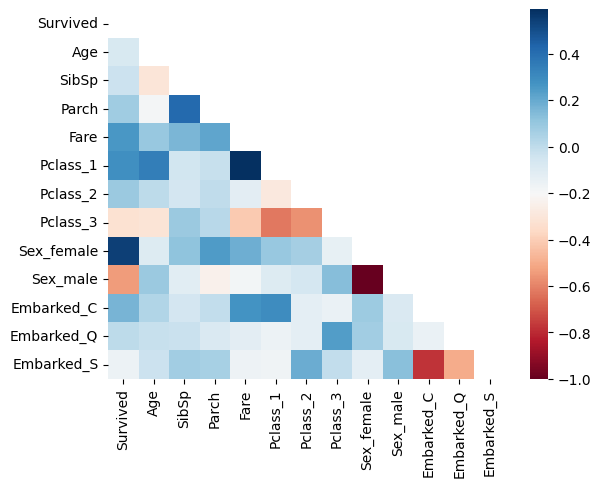

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df_encoded = pd.get_dummies(df[['Survived', 'Pclass',  'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])


correlation_matrix = df_encoded.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, cbar=True, mask=mask,cmap="RdBu")

The correlogram shows correlation between survival and sex, female sex showing to be associated with a higher surival rate than males. also the class of the passenger ticket show a higher survival rate for passenger located in first and second class compared to those of third class.

<Axes: xlabel='Survived', ylabel='count'>

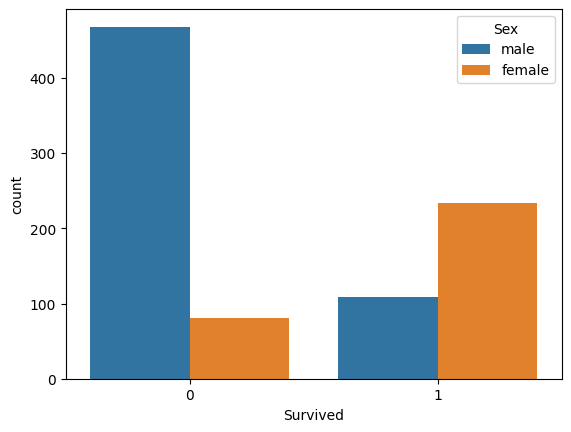

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=df)

As shown by the correlogram, the group of passenger that survived is composed mostly by females.

In [ ]:
pd.crosstab(df.Sex, df.Survived, margins=True).style.background_gradient(cmap='RdBu_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<Axes: xlabel='Survived', ylabel='count'>

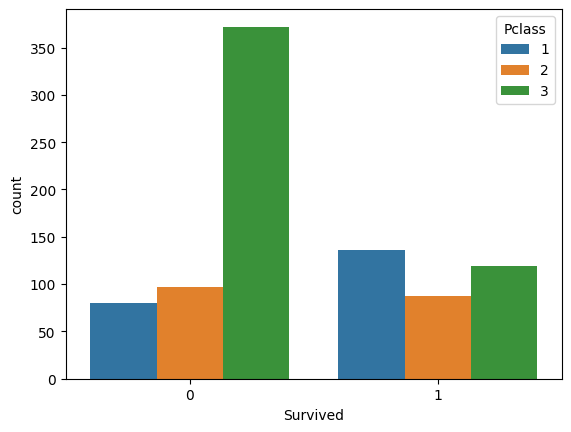

In [ ]:
sns.countplot(x='Survived',hue="Pclass",data=df)

The group of passenger that didn't survived was mainly composed by those with third class tickets.

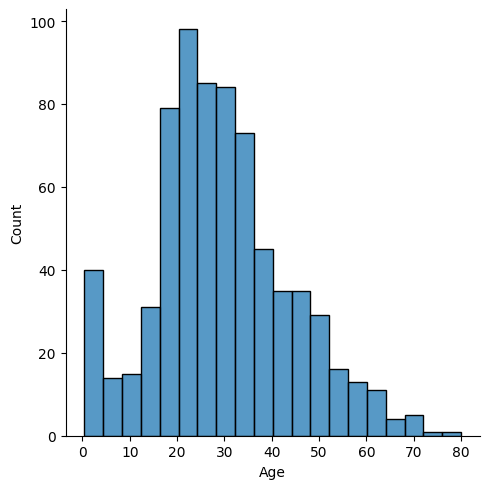

In [ ]:
sns.displot(df['Age'].dropna())

<Axes: xlabel='Pclass', ylabel='Age'>

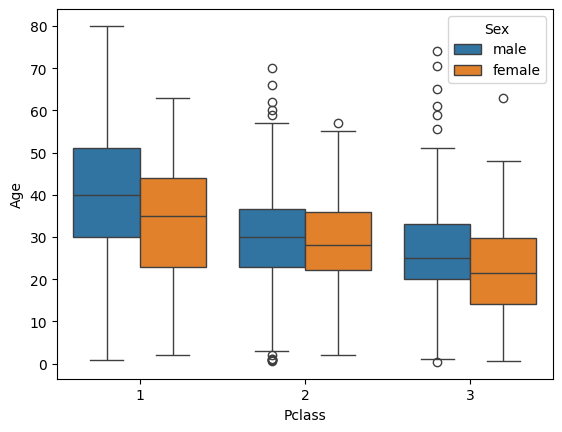

In [ ]:
sns.boxplot(data=df,x='Pclass',y='Age',hue='Sex')

It can be seen that there is a relation between the age of the passenger and the class of ticket they have, being younger passengers in third class and older in first.

In [ ]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='RdBu_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Is possible to see that Pclass 1 have a higher chance (62%) of survaving compared to Pclass 2 (47%) and Pclass 3 (24%).

<Axes: xlabel='Pclass', ylabel='Fare'>

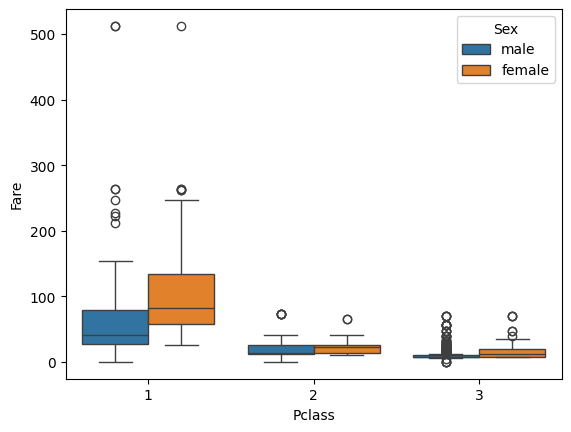

In [ ]:
x = df[['PassengerId','Fare','Pclass','Sex']].dropna()

sns.boxplot(y= x['Fare'], x = x['Pclass'], hue = x['Sex'])

Now that we know that Pclass and Sex are related to a higher survival rate. We reviewed the relationship between fare paid.

In [ ]:
x[x['Fare'] >500].set_index('PassengerId').join(df[['PassengerId','Cabin','Embarked','Ticket','Name']].set_index('PassengerId'), on = 'PassengerId')

In [ ]:
y = df.groupby(['Fare','Pclass']).agg({
    'Name': ['count'],
    'Survived': ['sum']
}).reset_index()

y.columns = ['Fare','Pclass','count','Survived']

y['srurvived_rate'] = y['Survived'] / y['count']

y.dropna(inplace=True)

y.head()

,Fare,Pclass,count,Survived,srurvived_rate
0,0.0000,1,5,0,0.00
1,0.0000,2,6,0,0.00
2,0.0000,3,4,1,0.25
5,4.0125,3,1,0,0.00
6,5.0000,1,1,0,0.00


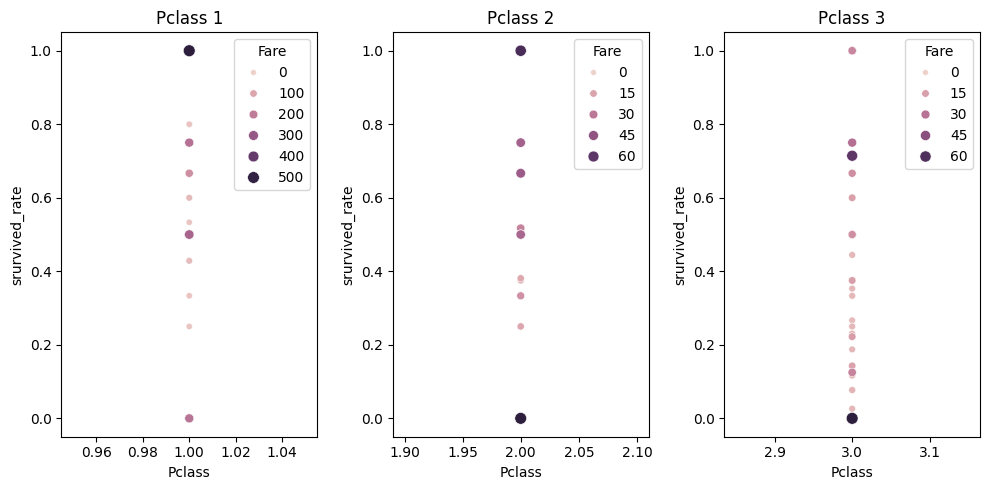

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

sns.scatterplot(data=y[y.Pclass == 1],
                y='srurvived_rate',
                x='Pclass',
                hue='Fare', size='Fare', ax=axes[0])
axes[0].set_title('Pclass 1')

sns.scatterplot(data=y[y.Pclass == 2],
                y='srurvived_rate', x='Pclass',
                hue='Fare', size='Fare', ax=axes[1])
axes[1].set_title('Pclass 2')

sns.scatterplot(data=y[y.Pclass == 3],
                y='srurvived_rate', x='Pclass',
                hue='Fare', size='Fare', ax=axes[2])
axes[2].set_title('Pclass 3')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

By exploring the relationship between Fare, Pclass, and survival rate, we aim to understand if there is an underlying correlation. It is plausible to consider that a higher fare might correlate with a higher survival rate. However, our analysis suggests that this is not the case.

# Classification

For the classification 3 different models were compared making use of Spark MLlib pipelines:
- Random Forest Classifier
- Linear SVC
- Multi Layer Perceptron Classifier

In [ ]:
#!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=f873f5992389e9f7e3e13e2ba18015e747b701629e33e51ab102dc08506f2d3e
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:

# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import avg, when
from pyspark.ml.classification import LinearSVC

In [ ]:
# Create a SparkSession
spark = SparkSession.builder \
    .appName("TitanicSurvivalPrediction") \
    .getOrCreate()

In [ ]:
# Load Titanic dataset
# Reads the dataset from csv
#mpg = pd.read_csv("/dbfs/FileStore/tables/mpg_data_processed.csv")
#mpg.head()
titanic_df = spark.read.csv("train.csv", header=True, inferSchema=True)
titanic_df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|      

In [ ]:
# Exploratory Data Analysis (EDA)
print("First few rows of the dataset:")
#titanic_df.show(5)

print("Summary statistics of the dataset:")
titanic_df.describe().show()

First few rows of the dataset:
Summary statistics of the dataset:
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|              Parch|            Ticket|             Fare|Cabin|Embarked|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|  count|              891|                891|               891|                 891|   891|               714|               891|                891|               891|              891|  204|     889|
|   mean|            446.0| 0.3838383838383838| 2.308641975308642|                NULL|  NULL| 29.69911764705882|0

In [ ]:

mean_age_by_class = titanic_df.groupBy("Pclass").agg(avg("Age").alias("mean_age"))


In [ ]:
# Fill missing age values based on the mean age of each passenger class
titanic_df = titanic_df.join(mean_age_by_class, on="Pclass", how="left")
titanic_df = titanic_df.withColumn("Age", when(titanic_df.Age.isNull(), titanic_df.mean_age).otherwise(titanic_df.Age))


Following the previously found during the EDA, we proceed to fill the null values of the passengers age with the mean age according to the ticket class they have.

In [ ]:
# Convert categorical features to numerical using StringIndexer
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index", handleInvalid="keep")
            for column in ["Sex", "Embarked"]]
pipeline_indexers = Pipeline(stages=indexers)
titanic_df = pipeline_indexers.fit(titanic_df).transform(titanic_df)

In [ ]:
# Define feature columns
feature_columns = ["Pclass", "Sex_index", "Age", "SibSp", "Parch", "Fare", "Embarked_index"]

In [ ]:
# Define stages of the pipeline
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
label_indexer = StringIndexer(inputCol='Survived', outputCol='label')


In [ ]:
# Define the pipeline
pipeline1 = Pipeline(stages=[vector_assembler, label_indexer])

In [ ]:
random_forest = RandomForestClassifier(featuresCol="features", labelCol="Survived", seed=42)
# Define the pipeline for RF
pipeline2 = Pipeline(stages=[pipeline1, random_forest])


In [ ]:
# Split the data into training and test sets
train_data, test_data = titanic_df.randomSplit([0.8, 0.2], seed=42)

In [ ]:
# Fit the pipeline to the training data
rfModel = pipeline2.fit(train_data)

In [ ]:
# Make predictions on the test data
predictions = rfModel.transform(test_data)

In [ ]:

evaluator = BinaryClassificationEvaluator(labelCol="Survived", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print("Area under the ROC curve (AUC) on test data:", auc)


Area under the ROC curve (AUC) on test data: 0.8685410334346503


In [ ]:


lsvc = LinearSVC(maxIter=10, regParam=0.1)

pipeline3 = Pipeline(stages = [pipeline1, lsvc])

# Fit the pipeline to the training data
svcModel = pipeline3.fit(train_data)
svcPredictions = svcModel.transform(test_data)


In [ ]:

evaluator = BinaryClassificationEvaluator(labelCol="Survived", metricName="areaUnderROC")
auc = evaluator.evaluate(svcPredictions)
print("Area under the ROC curve (AUC) on test data:", auc)


Area under the ROC curve (AUC) on test data: 0.8260963960052108


In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier

# specify layers for the neural network:
# input layer of size 2 (features), two intermediate of size 5 and 4
# and output of size 2 (classes)
#layers = [2,5,4,2]

layers = [7,7,5,2]

# create the trainer and set its parameters
perc= MultilayerPerceptronClassifier(layers=layers, maxIter=200)

pipeline4 = Pipeline(stages= [pipeline1, perc])


mpcModel= pipeline4.fit(train_data)
mpcModel.transform(train_data).select("rawPrediction").show()
mpcPredictions = mpcModel.transform(test_data)

+--------------------+
|       rawPrediction|
+--------------------+
|[-2.7507911681406...|
|[-2.6894040561725...|
|[-1.0865805335351...|
|[-0.4046617174040...|
|[-0.3628862073313...|
|[-2.5921801453375...|
|[-0.3227850167685...|
|[-2.7524992753644...|
|[-0.4812379432299...|
|[-0.3350179117736...|
|[-0.3881211353123...|
|[-0.2330134293686...|
|[-0.4071329458560...|
|[-0.4295716657806...|
|[-0.3802787118016...|
|[-0.4412706707267...|
|[-0.3745027338493...|
|[-0.4113651026249...|
|[-0.3906226155574...|
|[-2.6183311980819...|
+--------------------+
only showing top 20 rows



In [ ]:

evaluator = BinaryClassificationEvaluator(labelCol="Survived", metricName="areaUnderROC")
auc = evaluator.evaluate(mpcPredictions)
print("Area under the ROC curve (AUC) on test data:", auc)


Area under the ROC curve (AUC) on test data: 0.836300477637863


In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Define the parameter grid for hyperparameter tuning for RandomForestClassifier
paramGridRF = ParamGridBuilder() \
    .addGrid(random_forest.numTrees, [10, 20, 30]) \
    .addGrid(random_forest.maxDepth, [5, 10, 15]) \
    .build()

# Define the parameter grid for hyperparameter tuning for LinearSVC
paramGridSVC = ParamGridBuilder() \
    .addGrid(lsvc.maxIter, [10, 20]) \
    .addGrid(lsvc.regParam, [0.1, 0.01]) \
    .build()

# Define the parameter grid for hyperparameter tuning for MultilayerPerceptronClassifier
paramGridMPC = ParamGridBuilder() \
    .addGrid(perc.maxIter, [100, 200]) \
    .addGrid(perc.layers, [[len(feature_columns), 5, 4, 2], [len(feature_columns), 10, 5, 2]]) \
    .build()

# Define the evaluator
evaluator = BinaryClassificationEvaluator(labelCol="Survived", metricName="areaUnderROC")

# Define the cross-validator for RandomForestClassifier
crossvalRF = CrossValidator(estimator=pipeline2,
                          estimatorParamMaps=paramGridRF,
                          evaluator=evaluator,
                          numFolds=5)

# Fit the cross-validator to the training data for RandomForestClassifier
cvModelRF = crossvalRF.fit(train_data)

# Get the best model from the cross-validation for RandomForestClassifier
best_model_rf = cvModelRF.bestModel

# Make predictions on the test data using the best model for RandomForestClassifier
predictions_rf = best_model_rf.transform(test_data)

# Evaluate the best model for RandomForestClassifier
auc_rf = evaluator.evaluate(predictions_rf)
print("Area under the ROC curve (AUC) on test data for RandomForestClassifier:", auc_rf)

# Define the cross-validator for LinearSVC
crossvalSVC = CrossValidator(estimator=pipeline3,
                          estimatorParamMaps=paramGridSVC,
                          evaluator=evaluator,
                          numFolds=5)

# Fit the cross-validator to the training data for LinearSVC
cvModelSVC = crossvalSVC.fit(train_data)

# Get the best model from the cross-validation for LinearSVC
best_model_svc = cvModelSVC.bestModel

# Make predictions on the test data using the best model for LinearSVC
predictions_svc = best_model_svc.transform(test_data)

# Evaluate the best model for LinearSVC
auc_svc = evaluator.evaluate(predictions_svc)
print("Area under the ROC curve (AUC) on test data for LinearSVC:", auc_svc)

# Define the cross-validator for MultilayerPerceptronClassifier
crossvalMPC = CrossValidator(estimator=pipeline4,
                          estimatorParamMaps=paramGridMPC,
                          evaluator=evaluator,
                          numFolds=3)

# Fit the cross-validator to the training data for MultilayerPerceptronClassifier
cvModelMPC = crossvalMPC.fit(train_data)

# Get the best model from the cross-validation for MultilayerPerceptronClassifier
best_model_mpc = cvModelMPC.bestModel

# Make predictions on the test data using the best model for MultilayerPerceptronClassifier
predictions_mpc = best_model_mpc.transform(test_data)

# Evaluate the best model for MultilayerPerceptronClassifier
auc_mpc = evaluator.evaluate(predictions_mpc)
print("Area under the ROC curve (AUC) on test data for MultilayerPerceptronClassifier:", auc_mpc)

# Stop SparkSession
#spark.stop()


Area under the ROC curve (AUC) on test data for RandomForestClassifier: 0.8548632218844983
Area under the ROC curve (AUC) on test data for LinearSVC: 0.8124185844550583
Area under the ROC curve (AUC) on test data for MultilayerPerceptronClassifier: 0.8219713417281804


In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Initialize evaluators
binary_evaluator = BinaryClassificationEvaluator()
multiclass_evaluator = MulticlassClassificationEvaluator()

# Define a function to compute metrics for a given model and DataFrame
def compute_metrics(model, predictions_df):
    auc = binary_evaluator.evaluate(predictions_df)
    recall = multiclass_evaluator.setMetricName('weightedRecall').evaluate(predictions_df)
    precision = multiclass_evaluator.setMetricName("weightedPrecision").evaluate(predictions_df)
    f1 = multiclass_evaluator.setMetricName("f1").evaluate(predictions_df)
    return auc, recall, precision, f1

# Compute metrics for each model
metrics = {
    'RandomForest': compute_metrics(best_model_rf, predictions_rf),
    'LinearSVC': compute_metrics(best_model_svc, predictions_svc),
    'MPC': compute_metrics(best_model_mpc, predictions_mpc)
}

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.T

# Set Column names
column_names = ['AUC','Recall','Precision','f1']
metrics_df.columns = column_names

# Display the DataFrame
metrics_df

,AUC,Recall,Precision,f1
RandomForest,0.854863,0.813793,0.810159,0.806402
LinearSVC,0.812419,0.800000,0.795839,0.796870
MPC,0.821971,0.813793,0.810159,0.806402


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



predictions = rfModel.transform(test_data)#predictions = model2.transform(training_data_df)
class_temp = predictions.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
#class_names = map(str, class_temp)
#print(class_names)
#class_names

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

rf_auc = roc_auc_score(y_true, y_pred),
rf_recall =  recall_score(y_true, y_pred),
rf_precision =  precision_score(y_true, y_pred),
rf_f1 = f1_score(y_true, y_pred)

cnf_matrix = confusion_matrix(y_true, y_pred)
cnf_matrix

array([[88, 10],
       [17, 30]])

Confusion matrix, without normalization
[[88 10]
 [17 30]]


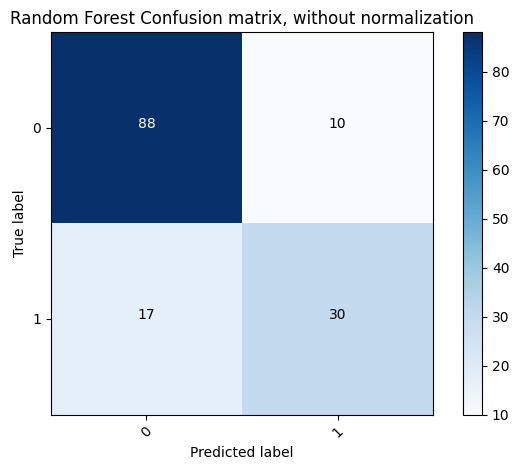

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"],
                      title='Random Forest Confusion matrix, without normalization')
plt.show()

Confusion matrix, without normalization
[[86 12]
 [17 30]]


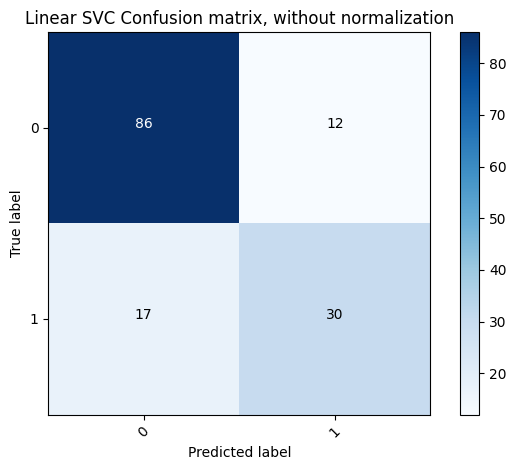

In [ ]:
predictions = svcModel.transform(test_data)#predictions = model2.transform(training_data_df)
class_temp = predictions.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()

from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

# Calculate metrics
svc_auc = roc_auc_score(y_true, y_pred),
svc_recall =  recall_score(y_true, y_pred),
svc_precision =  precision_score(y_true, y_pred),
svc_f1 = f1_score(y_true, y_pred)


cnf_matrix = confusion_matrix(y_true, y_pred)
cnf_matrix

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"],
                      title='Linear SVC Confusion matrix, without normalization')
plt.show()

Confusion matrix, without normalization
[[87 11]
 [21 26]]


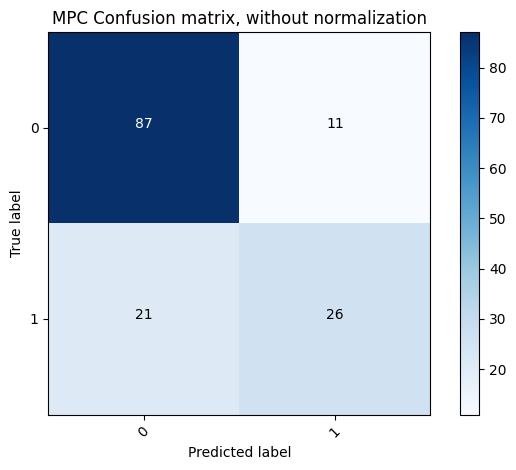

In [ ]:
predictions = mpcModel.transform(test_data)#predictions = model2.transform(training_data_df)
class_temp = predictions.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()

from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

mpc_auc = roc_auc_score(y_true, y_pred),
mpc_recall =  recall_score(y_true, y_pred),
mpc_precision =  precision_score(y_true, y_pred),
mpc_f1 = f1_score(y_true, y_pred)

cnf_matrix = confusion_matrix(y_true, y_pred)
cnf_matrix

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"],
                      title='MPC Confusion matrix, without normalization')
plt.show()

Three different models where evaluated while they performed similar on the dataset analyzed the best one showed to be Random Forest, performing the best in all the different metrics explored.
